*** Q ***

1

in A_zwickau there is some strange text that looks like: 

Beatus venter Ante portam orientalem civitatis ad iactum 2 sagittarum in arena ostenditur locus predicationis Ihesu Christi, ubi extulit vocem mulier de turba, d[icens]

need to understand what is meanin of \[ and how proceed this kind of words

2 

There is usage „Beatus venter“ VS “Beatus venter qui te portavit et ubera que succisti,” should be escaped or considered as punctuation usage?

In [1]:
# some manual processing that i did:
# convert docx to txt format
# remove footer from txt file
# remove header in english

import os
import pandas as pd


A_ZWICKAU_FILE_NAME = "A_Zwickau_RB_I_XII_5 (12).txt"
B_LONDON_FILE_NAME = "B_London_BL_Add_18929 (6).txt"

a_zwickau_file_path = os.path.join("full", A_ZWICKAU_FILE_NAME)
b_london_file_path = os.path.join("full", B_LONDON_FILE_NAME)

a_zwickau_text = open(a_zwickau_file_path).read()
b_london_text = open(b_london_file_path).read()

In [2]:
def create_corpus(raw_text):
    return [t.strip().replace("„", '"').replace("“", '"') for t in raw_text.split("\n")]

In [3]:
a_zwickau_corpus = create_corpus(a_zwickau_text)
b_london_corpus = create_corpus(b_london_text)

In [4]:
def get_lexical_features(text_array):
    text = ' '.join(text_array)
    
    total_characters = len(text)
    total_words = len(text.split())
    unique_words = len(set(text.split()))
    
    return total_characters, total_words, unique_words

In [5]:
def create_lexical_features_df(text, label):
    df = pd.DataFrame(dtype=float)
    total_characters, total_words, unique_words = get_lexical_features(text)
    
    df.loc[label, 'total_characters'] = total_characters
    df.loc[label, 'total_words'] = total_words
    df.loc[label, 'unique_words'] = unique_words
    
    return df

,total_characters,total_words,unique_words
A_Zwickau_RB_I_XII_5,177917.0,27396.0,8218.0
B_London_BL_Add_18929,197760.0,30586.0,8664.0


<AxesSubplot:>

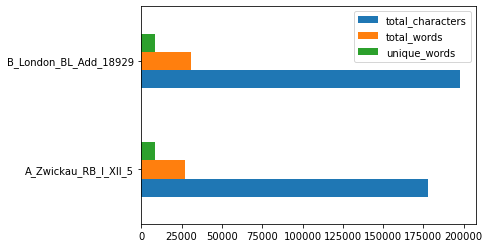

In [6]:
lexical_features_df = pd.concat([
    create_lexical_features_df(a_zwickau_corpus, "A_Zwickau_RB_I_XII_5"), 
    create_lexical_features_df(b_london_corpus, "B_London_BL_Add_18929")
])

display(lexical_features_df)
lexical_features_df.plot(kind="barh")

In [7]:
def create_words_frequency(corpus):    
    word_frequency = {}
    for word in' '.join(corpus).split():
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return {k: v for k, v in sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)}

In [8]:
create_words_frequency(a_zwickau_corpus)

{'et': 1462,
 'in': 967,
 'est': 530,
 'ad': 413,
 'de': 319,
 'que': 252,
 'quod': 229,
 'per': 218,
 'contra': 197,
 'sunt': 186,
 'qui': 167,
 'usque': 158,
 'non': 155,
 'a': 154,
 'cum': 140,
 'De': 140,
 'ab': 139,
 'ubi': 136,
 'sed': 119,
 'quia': 94,
 'ut': 93,
 'tamen': 90,
 'etiam': 89,
 'erat': 87,
 'terra': 87,
 'autem': 85,
 'fuit': 85,
 'eius': 79,
 'dicitur': 78,
 'vero': 77,
 'leucis': 76,
 'ibi': 75,
 'Inde': 75,
 'In': 69,
 'quo': 69,
 'vel': 67,
 'mare': 66,
 'quam': 64,
 'valde': 64,
 'sub': 63,
 'sive': 63,
 'iuxta': 63,
 'qua': 60,
 'civitas': 60,
 'sicud': 60,
 'monte': 59,
 'nunc': 58,
 'enim': 56,
 'austrum': 54,
 'loco': 54,
 '3': 53,
 'pro': 52,
 'ea': 52,
 'habet': 52,
 'montis': 52,
 'fere': 51,
 'illa': 51,
 '4': 50,
 '2': 48,
 '1': 48,
 'Et': 48,
 'inter': 46,
 'eam': 46,
 'nec': 45,
 'orientem': 45,
 '5': 44,
 'inde': 44,
 'parte': 43,
 'supra': 42,
 'sita': 41,
 'similiter': 41,
 'leucas': 41,
 'ita': 40,
 'esse': 40,
 'mons': 40,
 'ista': 39,
 'ibidem

In [9]:
create_words_frequency(b_london_corpus)

{'et': 1596,
 'in': 1063,
 'est': 608,
 'ad': 426,
 'de': 353,
 'quod': 258,
 'per': 249,
 'que': 245,
 'contra': 244,
 'sunt': 197,
 'qui': 181,
 'usque': 178,
 'De': 178,
 'a': 175,
 'non': 173,
 'cum': 153,
 'ab': 145,
 'ubi': 139,
 'sed': 129,
 'ut': 125,
 'autem': 110,
 'erat': 108,
 'tamen': 105,
 'dicitur': 101,
 'fuit': 100,
 'eius': 98,
 'etiam': 95,
 'monte': 94,
 'quia': 92,
 'quo': 92,
 'ibi': 88,
 'vero': 88,
 'sicut': 86,
 'Et': 85,
 'In': 84,
 'iuxta': 82,
 'loco': 79,
 'valde': 78,
 'Mare': 73,
 'leucis': 73,
 'terra': 72,
 'fere': 72,
 'mons': 71,
 'nunc': 69,
 'ista': 66,
 'qua': 66,
 '2': 66,
 'sub': 65,
 'civitas': 65,
 'enim': 64,
 'pro': 62,
 'vel': 62,
 'quam': 61,
 'austrum': 59,
 'locus': 57,
 'ea': 55,
 'orientem': 55,
 'civitatis': 54,
 'habet': 53,
 'Inde': 53,
 'eam': 52,
 'montis': 52,
 'leucas': 52,
 'inter': 51,
 'sive': 51,
 'ita': 50,
 'nec': 49,
 'adhuc': 48,
 'parte': 48,
 '4': 47,
 'hodie': 46,
 'supra': 46,
 '1': 45,
 'locum': 45,
 'inde': 44,
 'ib